## Loading a text file in Python


We'll open the file directly just to look at its contents:

In [1]:
data_file_name = "JAHANMI2.txt"

with open(data_file_name, 'r') as fin:
    print(fin.read())

 Id Lab Num Test    Y    X1 X2 X3 X4 Trt Set Llab Rep Bat Sblab Set2
  1  1    1   1  608.781 -1 -1 -1 -1   1  1  0.75  1  1  0.50   1
  2  1    2   1  569.670 -1 -1 -1 -1   1  1  0.75  1  2  0.75   1
  3  1    3   1  689.556 -1 -1 -1 -1   1  1  0.75  1  1  0.50   1
  4  1    4   1  747.541 -1 -1 -1 -1   1  1  0.75  1  2  0.75   1
  5  1    5   1  618.134 -1 -1 -1 -1   1  1  0.75  1  1  0.50   1
  6  1    6   1  612.182 -1 -1 -1 -1   1  1  0.75  1  2  0.75   1
  7  1    7   1  680.203 -1 -1 -1 -1   1  1  0.75  1  1  0.50   1
  8  1    8   1  607.766 -1 -1 -1 -1   1  1  0.75  1  2  0.75   1
  9  1    9   1  726.232 -1 -1 -1 -1   1  1  0.75  1  1  0.50   1
 10  1   10   1  605.380 -1 -1 -1 -1   1  1  0.75  1  2  0.75   1
 11  1   11   1  518.655 -1 -1 -1 -1   1  1  0.75  1  1  0.50   1
 12  1   12   1  589.226 -1 -1 -1 -1   1  1  0.75  1  2  0.75   1
 13  1   13   1  740.447 -1 -1 -1 -1   1  1  0.75  1  1  0.50   1
 14  1   14   1  588.375 -1 -1 -1 -1   1  1  0.75  1  2  0.75   1
 15  1 

We observe that 
1. this is a space delimited file 
2. Each row corresponds to a data point
3. Each column corresponds to a variable
4. There is a header row that contains column labels
5. There doesn't appear to be any *missing data*.

We will now use a Python library called **numpy** to help us load a text data file. To do this, we must import it.

In [3]:
import numpy as np

# use the loadtxt function to load the data into a two-dimensional array
data = np.loadtxt(data_file_name, skiprows=1)

Let's print the first 5 rows / data points of this data

In [3]:
np.set_printoptions(suppress=True)

# print first 5 rows
print(data[0:5, :])

[[  1.      1.      1.      1.    608.781  -1.     -1.     -1.     -1.
    1.      1.      0.75    1.      1.      0.5     1.   ]
 [  2.      1.      2.      1.    569.67   -1.     -1.     -1.     -1.
    1.      1.      0.75    1.      2.      0.75    1.   ]
 [  3.      1.      3.      1.    689.556  -1.     -1.     -1.     -1.
    1.      1.      0.75    1.      1.      0.5     1.   ]
 [  4.      1.      4.      1.    747.541  -1.     -1.     -1.     -1.
    1.      1.      0.75    1.      2.      0.75    1.   ]
 [  5.      1.      5.      1.    618.134  -1.     -1.     -1.     -1.
    1.      1.      0.75    1.      1.      0.5     1.   ]]


Let's print the first 5 rows again, but only include "Id" (Column **0**), "Y" (Column **4**) and "X2" (Column **6**)

In [4]:
# print first 5 rows and columns 0, 4, and 6
print(data[0:5, [0,4,6]])

[[  1.    608.781  -1.   ]
 [  2.    569.67   -1.   ]
 [  3.    689.556  -1.   ]
 [  4.    747.541  -1.   ]
 [  5.    618.134  -1.   ]]


**Question**: How would you print only the 10th row? How would you print only the 4th column?

In [ ]:
# Print only the 10th row
print(data[?, ?])

# Print only the 4th column
print(data[?, ?])

## Examining the data size

The first questions we can ask:

**How much data do we have?**

**What is the shape of the data?**

(Why do we care?)

In [5]:
# print data shape
print(data.shape)

(480, 16)


This tells us that we have 480 rows (data points) and 16 columns (variables).


Now, let's make sure that we don't have badly formatted data (which is often an indication of missing data). If
there was missing or badly formatted data somewhere in the data file, the function ``np.loadtxt`` would insert a NaN (not a number) in its place.

We can check for the presence of NaN entries using `np.isnan` and `np.any`

In [9]:
# check if any nan
print("Results from np.isnan:")
print(np.isnan(data))

# this is hard to parse, lets ask python to check all the entries using np.any
# np.any returns a True if any value returned from np.isnan(data) is set to True
# It returns False if all the values are False.

print("Results from np.any:")
print(np.any(np.isnan(data)))

Results from np.isnan
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
Results from np.any
False


## Summary statistics of Y

Y (the reported strength of the ceramic materials) is the response variable for this data set. Let's try to get some basic summary statistics such as

1. The average (or *mean*) value.
2. The middle (or *median*) value.
3. The maximum and minimum values.
4. The range of the values.
5. The standard deviation (how much on average are reported Y values are from the mean)?

The ``numpy`` library has functions to calculate these values.


In [5]:
# get the 4th column from the data
Y = data[:, 4]

# Mean
mean_Y = np.mean(Y)
print(mean_Y)

650.0773083333333


In [7]:
# Median
median_Y = np.median(Y)
print(median_Y)

646.6275


In [10]:
# Maximum and Minimum
max_Y = np.max(Y)
min_Y = np.min(Y)

print("Min Y = " + str(min_Y) + ", Max Y = " + str(max_Y))

Min Y = 345.294, Max Y = 821.654


In [12]:
# Range
range_Y = max_Y - min_Y
print("Range = " + str(range_Y))

Range = 476.36


In [13]:
# Standard deviation
std_Y = np.std(Y)
print("Std = " + str(std_Y))

Std = 74.56047000712977


## Plotting Y

To perform plots, we need to import the ``matplotlib.pylot`` library

In [7]:
import matplotlib.pyplot as plt

### Run Plot

One of the easiest plots we can make is a **run plot**, where we just plot $Y$ versus the experiment index.

This only makes sense because we are thinking of the rows as containing some sort of implicit ordering.

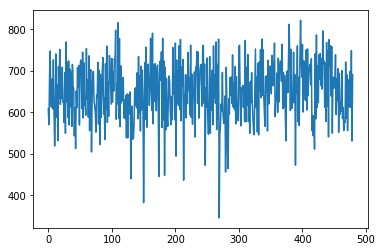

In [15]:
# Run Plot
plt.plot(Y)

### Histogram

Another easy plot is a histogram, which bins similar values of $Y$ observations, and plots a bar chart to show the frequency of similar $Y$ values in the data.

(array([  2.,   2.,   6.,  12.,  67., 119.,  78., 117.,  63.,  14.]),
 array([345.294, 392.93 , 440.566, 488.202, 535.838, 583.474, 631.11 ,
        678.746, 726.382, 774.018, 821.654]),
 <a list of 10 Patch objects>)

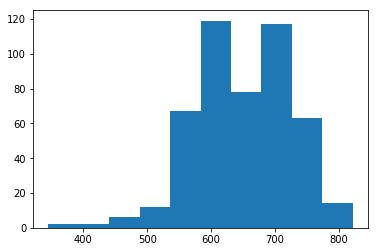

In [16]:
# Histogram plot
plt.hist(Y)

### Box Plot

Another way of visualizing summary statistics is a box plot.

{'whiskers': [<matplotlib.lines.Line2D at 0x111a0f908>,
 'caps': [<matplotlib.lines.Line2D at 0x111a19208>,
 'boxes': [<matplotlib.lines.Line2D at 0x111a0f7b8>],
 'medians': [<matplotlib.lines.Line2D at 0x111a19a58>],
 'fliers': [<matplotlib.lines.Line2D at 0x111a19e80>],
 'means': []}

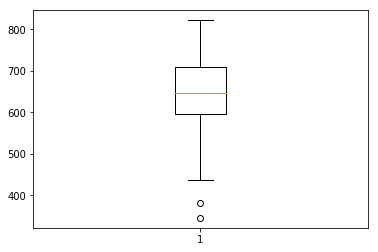

In [17]:
# Box plot
plt.boxplot(Y)

Here, the vertical axis correspond to $Y$ values. The orange line indicates the median value among the data. The rectangle shows the interval between 25% and 75% quantiles. That is, 50% of the data closest to the median is within this interval. The thin line shows the maximum and minimum values of the $Y$ data, after removing outliers. The two dots are two outlier data points - points that are uncharacteristically small given the rest of the data.

Note that there are no large outliers - points that are uncharacteristically large.

### QQ Plots

Looking at the histogram of $Y$, we may think that the data looks like a bell curve. That is, we may think that the data has a **Normal (aka Gaussian)** distribution. We can visualize how well this appears using a **Quantile-Quantile (QQ) plot**.

To do this, we'll use another library called ``scipy``, and particular the function ``scipy.stats.probplot``, which is located in the sub-library ``scipy.stats``

((array([-2.97962347, -2.6966022 , -2.5373792 , -2.42443823, -2.33591654,
         -2.26262051, -2.19977879, -2.14458436, -2.09524077, -2.05052635,
         -2.00957116, -1.97173298, -1.93652366, -1.90356318, -1.87254966,
         -1.84323916, -1.81543166, -1.78896098, -1.76368753, -1.73949289,
         -1.71627565, -1.69394832, -1.67243485, -1.65166871, -1.63159133,
         -1.6121509 , -1.59330134, -1.57500146, -1.55721433, -1.53990665,
         -1.52304835, -1.50661212, -1.4905731 , -1.47490862, -1.45959792,
         -1.44462192, -1.42996309, -1.41560525, -1.40153344, -1.38773381,
         -1.37419351, -1.36090056, -1.34784383, -1.33501292, -1.32239811,
         -1.30999029, -1.29778094, -1.28576204, -1.27392606, -1.2622659 ,
         -1.25077488, -1.23944668, -1.22827534, -1.21725522, -1.20638098,
         -1.19564755, -1.18505013, -1.17458415, -1.16424527, -1.15402937,
         -1.1439325 , -1.13395093, -1.12408108, -1.11431953, -1.10466302,
         -1.09510844, -1.08565279, -1.

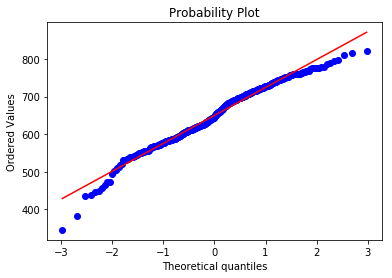

In [18]:
# Import the stats library. we won't give it an alias
from scipy import stats
stats.probplot(Y, dist='norm', plot=plt)

If the observed distribution of the $Y$ data was really a Normal distribution, the blue dots and the red line would line up perfectly. In fact, they do line up fairly well in the middle, but only deviate for large and small values of the observed data. This tells us that the tails (extreme values of $Y$) do not follow a normal distribution.

### Lag Plot

We may want to see if the order the data is reported influences the values reported. One way to do this is by a lag plot.

If the data points are $Y = (Y_0, Y_1, ..., Y_{479})$, a lag-$n$ plot plots $Y_i$ versus $Y_{i-n}$. This can help us detect a time dependence on the data, which we may have to remove.

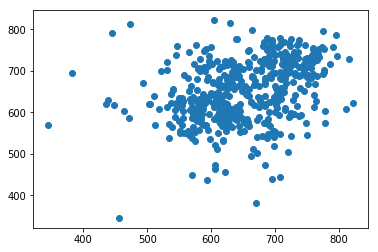

In [21]:
# Define the lag
n = 10

# Define the lagged variable by removing the first n entries from the original Y list.
Y_lagged = Y[n: 480]

# Truncate the unlagged variable to be the same length as the lagged variable, 
# by removing the last n entries from the original Y list
Y_unlagged = Y[0:480-n]

# Make a scatter plot of lagged vs unlagged data points
plt.scatter(Y_lagged, Y_unlagged)

If there wasn't a time or order dependence, then the above plot wouldn't have much structure. Eyeballing the plot, we do observe some structure, but how do we quantify this?

## Effect of Batch on Response

Now we want to understand the effect of the other variables on the response variable. For example, we can ask how changing the Batch (column 13) affects ceramic strength. This is very typical in experimental materials, in which the response may change based on different batches that you must order from a supplier.

### Scatter Plot
One of the first things we can do is to plot $B$ vs $Y$.

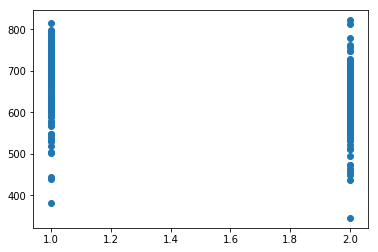

In [23]:
# define B 
B = data[:,13]

# Scatter plot B, Y
plt.scatter(B, Y)

This plot really doesn't tell us much, except that we observe that there are only 2 values of the Batch variable, 1 and 2. The points overlap too much for us to say anything else more meaningful.

### Conditioning on Batch Number

Let's look at the response $Y$ for the first two batches. We'll write $Y | B = 1$ to indicate the $Y$ data values corresponding to the first batch and $Y | B = 2$ for the $Y$ values corresponding to the second batch.

(array([ 1.,  1.,  5.,  7., 60., 95., 38., 25.,  5.,  3.]),
 array([345.294, 392.93 , 440.566, 488.202, 535.838, 583.474, 631.11 ,
        678.746, 726.382, 774.018, 821.654]),
 <a list of 10 Patch objects>)

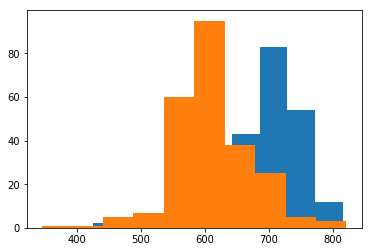

In [24]:
# Boolean indexing - This will be a 480-long array of True/False Values, True when Batch is 1, False otherwise.
I_B1 = (B==1)

# Use the boolean index to extract the Y values corresponding to the cases when Batch is 1
Y_given_B1 = Y[I_B1]

# Same with Batch 2
I_B2 = (B==2)
Y_given_B2 = Y[I_B2]

# plot histograms of both
plt.hist(Y_given_B1)
plt.hist(Y_given_B2)


We see that the two distributions for $Y|B=1$ and $Y|B=2$ are visually distinct, at least in where their mean or median values are. That is, the two distirbutions "peak" at different places. What about the spread, or standard deviation of the distributions? Are they similar?

### Summary statistics of conditional response

We see that the distributions are somewhat different. Let's compare their mean and standard deviations.

In [26]:
# Y|B=1 mean and std
mean_Y_given_B1 = np.mean(Y_given_B1)
std_Y_given_B1 = np.std(Y_given_B1)

# Y|B=2 mean and std
mean_Y_given_B2 = np.mean(Y_given_B2)
std_Y_given_B2 = np.std(Y_given_B2)

print("Y | B=1 : mean = " + str(mean_Y_given_B1) + ", std = " + str(std_Y_given_B1))
print("Y | B=2 : mean = " + str(mean_Y_given_B2) + ", std = " + str(std_Y_given_B2))

Y | B=1 : mean = 688.9986416666667, std = 65.41238711300481
Y | B=2 : mean = 611.155975, std = 61.72525099712198


**Questions**: 
* Are these two distributions significantly different? 
* That is, is there a strong batch effect on the response?
* How can you be sure of your answer?

**Question** We made histogram plots for the conditional responses $Y | B=1$ and $Y | B=2$. 
* Can you make the other types of plot for these conditional responses? 
* What do they tell you?

## Effect of Lab

This experiment was done across 8 different labs (Column 1). How different are the results from the different labs?

We'll again use conditioning to pick out the response function values specific to particular labs. Again, we will write

$$ Y | L = i $$

to describe the response function values obtained from lab $i$.

(array([6., 3., 6., 9., 3., 8., 9., 8., 5., 3.]),
 array([530.68  , 557.1953, 583.7106, 610.2259, 636.7412, 663.2565,
        689.7718, 716.2871, 742.8024, 769.3177, 795.833 ]),
 <a list of 10 Patch objects>)

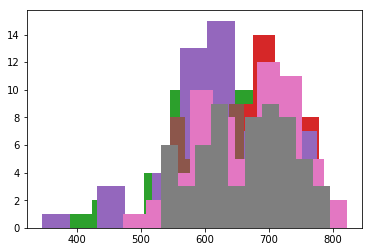

In [27]:
# Define L
L = data[:,1]

# Define conditionals
Y_given_L1 = Y[L == 1]
Y_given_L2 = Y[L == 2]
Y_given_L3 = Y[L == 3]
Y_given_L4 = Y[L == 4]
Y_given_L5 = Y[L == 5]
Y_given_L6 = Y[L == 6]
Y_given_L7 = Y[L == 7]
Y_given_L8 = Y[L == 8]

plt.hist(Y_given_L1)
plt.hist(Y_given_L2)
plt.hist(Y_given_L3)
plt.hist(Y_given_L4)
plt.hist(Y_given_L5)
plt.hist(Y_given_L6)
plt.hist(Y_given_L7)
plt.hist(Y_given_L8)


This was too much copy-and-pasting! Let's try to be a bit more programmatic by writing a ``for``-loop:

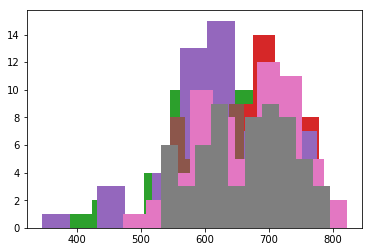

In [29]:
# iterate over labs, i = 0, 1, ..., 7
for i in range(8):
    # form boolean index (need i+1 since the labs are numbered
    # between 1 and 8, but the counter i goes between 0 and 7.
    I_Li = (L == (i+1))
    
    # condition on lab number
    Y_given_Li = Y[I_Li]
    
    # plot histogram
    plt.hist(Y_given_Li)
    

We get the same plot, but with less copy and pasting (imagine if we had 100 labs)!

But still, this is too much to look at! Let's try to instead summarize each histogram by  computing the mean of each of the conditional $Y$ values, and plotting the mean values for each lab, instead of the entire histogram.

mean values array: 
[645.61246667 655.21211667 633.31615    650.3897     630.49545
 656.26075    666.1775     663.15433333]


Text(0,0.5,'Mean Y conditioned on lab')

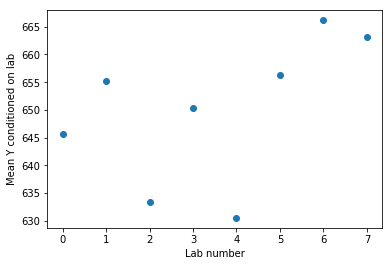

In [34]:
# allocate mean_values array to store the computed means of each conditionals
# one entry per lab (so 8 total)
mean_values_arr = np.zeros(8)

# loop over lab numbers
for i in range(8):
    # boolean index to get condition that L = i
    I_Li = (L == (i+1))
    
    # Condition on lab number
    Y_given_Li = Y[I_Li]
    
    # calculate conditional mean and store it in the array
    mean_values_arr[i] = np.mean(Y_given_Li)
       
# after going calculating conditional mean values for each lab, 
# mean_values_arr will store those mean values
print("mean values array: ")
print(mean_values_arr)


# plot the mean values
plt.plot(mean_values_arr, linewidth=0, marker='o')
plt.xlabel('Lab number')
plt.ylabel('Mean Y conditioned on lab')

How does this variance between labs compare to the variance between batches?

**Question** We used the mean value summary statistic to simplify the plots for different labs. 
* What are other ways we can visualize the response value conditional on lab number?

For example, below is how to make several box plots, each corresponding to the distribution of $Y$ given a particular lab number

Text(0,0.5,'Y conditioned on lab')

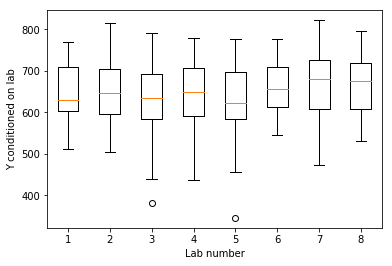

In [40]:
# boxplot can take a Python list of data arrays. If given a list instead of 
# a single data array, boxplot will make several box plots, one for each
# array in the list

# declare the list that will hold data arrays
Y_vals_list = []

# iterate over labs, i = 0, 1, ..., 7
for i in range(8):
    # form boolean index (need i+1 since the labs are numbered
    # between 1 and 8, but the counter i goes between 0 and 7.
    I_Li = (L == (i+1))
    
    # condition on lab number
    Y_given_Li = Y[I_Li]
    
    # add conditional values to list using the built-in `append` 
    # function for Python lists
    Y_vals_list.append(Y_given_Li)
    
# plot box plot
plt.boxplot(Y_vals_list)
plt.xlabel("Lab number")
plt.ylabel("Y conditioned on lab")

## Multiple Conditioning

Did each lab handle the different batches the same? Maybe some labs were able to eliminate the batch effect. Let's try to compare the simultaneous effect of the batch and lab.

Now we want to look at response values obtain for a specific batch and a specific lab. For a batch i and lab j, we'll write

$$ Y |(B = i \text{ AND } L = j) $$

for the response values corresponding to both batch i and lab j. In Python, to combine two logical indices with an ``AND`` statement, we'll use the numpy function ``np.logical_and``.

Text(0,0.5,'Y conditioned on Lab and Batch')

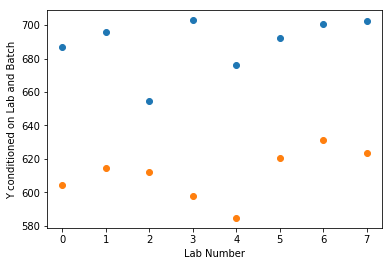

In [42]:
# define 2 dimensional array to store the mean values for response given batch and lab
# the 2D array will have 2 rows (one for each batch) and 8 columns (one for each lab)
mean_values_2d_arr = np.zeros([2,8])

# loop over batch number
for i in range(2):
    # loop over lab number
    for j in range(8):
        I_Bi = (B == (i+1))
        I_Lj = (L == (j+1))
     
        # find indices where batch is i AND lab is j
        I_Bi_Lj = np.logical_and(I_Bi, I_Lj)
        
        # Condintion Y on B=i and L=j
        Y_given_Bi_Lj = Y[I_Bi_Lj]        
      
        # calculate the conditional mean values
        mean_values_2d_arr[i,j] = np.mean(Y_given_Bi_Lj)
        
               
# Now the first row of mean values corresponds to batch 1
# and the second row correspons to batch 2. Columns 
# correspond to different labs. Let's plot the values

# Plot the mean values of Y for different labs, given first batch
plt.plot(mean_values_2d_arr[0,:], linewidth=0, marker='o')

# Plot the mean values of Y for different labs, given second batch
plt.plot(mean_values_2d_arr[1,:], linewidth=0, marker='o')

plt.xlabel('Lab Number')
plt.ylabel('Y conditioned on Lab and Batch')

**Question** 
* What does this tell us about the batch effect? 
* Did any lab account for the batch effect?
* What is consistent between labs?

## Summary

In this lecture, we learned some ways to look at the data. We learned how to load the data into a numpy array called `data`. We also learned how to extract different rows and columns from the data. For example, to just get the column corresponding to the strength of the ceramic materials (column 4), we used the command `Y = data[:, 4]`.

We also learned how to use numpy to calculate summary statistics for an array of numerical data. Specifically, we saw how to calculate
* Mean values using `np.mean`
* Median values using `np.median`
* Standard deviation using `np.std`
* Maximum and minimum values using `np.max` and `np.min`

We also learned how to visualize the data with some plots using the `matplotlib.pyplot` and `scipy.stats` packages. Specifically, we saw how to make the following plots:

* Run plots (`plt.plot(Y)`)- which plots data values vs. row index.
* Histograms (`plt.hist(Y)`) - which shows the frequency of values among the data.
* Boxplots (`plt.boxplot(Y)` or `plt.boxplot(Y_list)`) - which shows one or several box plots, which are one dimensional representations of the data showing median values, the interval between 25% and 75% percentiles, outliers, and range of the data.
* QQ plots (`scipy.stats.probplot`) - which allows us to compare observed data to specific distributions, such as the Normal distribution.
* Scatter plots (`plt.scatter`) - which plots two variables against each other as $(x,y)$ pairs of points.

We lastly showed how to condition your data, that is pick subsets of your data ccording to some condition. For example, we wanted to get the $Y$ values that correspond to when the batch was equal to 1, which we wrote as $Y | B = 1$ and used the phrase "Y given B equal to 1". To do this in python, we used Boolean indexing which was done in two steps.

* Define an array of True/False values in which the "True" values correspond to the data we want to extract. For example, we made such an *index array* `I_B1 = (B == 1)` to be True when the batch equaled 1, and False otherwise.
* Use the index array to extract the proper subset from the response array $Y$ using `Y_given_B1 = Y[I_B1]`.

We used this to perform a similar analysis on subsets of the $Y$ data corresponding to specific batches or specific labs. We then compared the results of this analysis between batches and labs to see if these had a significant effect on the statistics of $Y$.


In [6]:
X11 = data[:,11]
X14 = data[:,14]

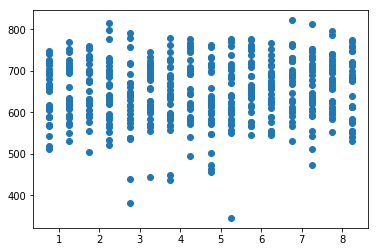

In [8]:
plt.scatter(X11, Y)

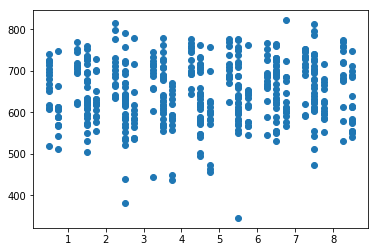

In [9]:
plt.scatter(X14, Y)

(array([[0., 0., 0., 0., 0., 0., 0., 2., 1., 3., 4., 6., 1., 3., 3., 5.,
         2., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 2., 7.,
         1., 2., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 1., 1., 2., 3., 7., 2., 4., 3., 2.,
         4., 2., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 3., 3., 3., 0., 2., 0.,
         1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 3., 2., 3., 2.,
         1., 0., 2., 1.],
        [0., 1., 0., 1., 0., 0., 0., 3., 4., 6., 8., 6., 6., 3., 2., 3.,
         0., 1., 2., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 2., 3., 5.,
         2., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 4., 4., 5., 2., 1., 7., 4.,
         2., 1., 1., 0.],
        [0., 0., 0., 1., 1., 0., 0., 0., 1., 2., 3., 1., 3., 2., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 4., 2.,
         2., 3., 1., 0.],
        [0

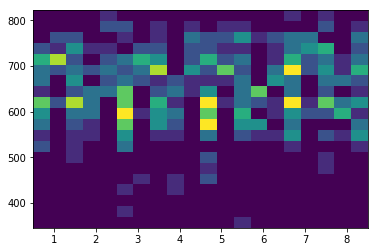

In [34]:
plt.hist2d(data[:,14], Y, bins=20)